<a href="https://colab.research.google.com/github/mpudoka/Data_Management/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset

In [2]:
mani_dataframe= pd.read_csv('DiabetesPrev.csv')

In [3]:
mani_dataframe.columns

Index(['year', 'fips', 'state_fips', 'county_fips', 'county_name',
       'state_name', 'state_abbr', 'metro_nonmetro',
       'diabetes_population_20_over', 'total_population_inferred_20_over'],
      dtype='object')

In [4]:
mani_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25137 entries, 0 to 25136
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               25137 non-null  int64  
 1   fips                               25137 non-null  int64  
 2   state_fips                         25137 non-null  int64  
 3   county_fips                        25137 non-null  int64  
 4   county_name                        25137 non-null  object 
 5   state_name                         25137 non-null  object 
 6   state_abbr                         25137 non-null  object 
 7   metro_nonmetro                     25137 non-null  object 
 8   diabetes_population_20_over        25137 non-null  float64
 9   total_population_inferred_20_over  25137 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.9+ MB


In [5]:
mani_dataframe.shape

(25137, 10)

In [6]:
mani_dataframe.head()

,year,fips,state_fips,county_fips,county_name,state_name,state_abbr,metro_nonmetro,diabetes_population_20_over,total_population_inferred_20_over
0,2007,1001,1,1,Autauga County,Alabama,AL,Metropolitan,4044.0,35474.0
1,2011,1001,1,1,Autauga County,Alabama,AL,Metropolitan,4748.0,39240.0
2,2009,1001,1,1,Autauga County,Alabama,AL,Metropolitan,4338.0,35268.0
3,2006,1001,1,1,Autauga County,Alabama,AL,Metropolitan,4038.0,35421.0
4,2012,1001,1,1,Autauga County,Alabama,AL,Metropolitan,4724.0,39367.0


In [7]:
mani_dataframe.describe()

,year,fips,state_fips,county_fips,diabetes_population_20_over,total_population_inferred_20_over
count,25137.000000,25137.000000,25137.000000,25137.000000,25137.000000,2.513700e+04
mean,2009.500457,30396.313283,30.292597,103.716712,6657.227847,7.171656e+04
std,2.291186,15157.850714,15.139568,107.939015,19304.809445,2.280921e+05
min,2006.000000,1001.000000,1.000000,1.000000,4.000000,3.800000e+01
25%,2008.000000,18179.000000,18.000000,35.000000,874.000000,8.192000e+03
50%,2010.000000,29177.000000,29.000000,79.000000,2059.000000,1.902200e+04
75%,2012.000000,45083.000000,45.000000,133.000000,5037.000000,4.924800e+04
max,2013.000000,56045.000000,56.000000,840.000000,678712.000000,7.458374e+06


# Dropping Columns:

The 'state_abbr' column was removed as it contained redundant information already captured in the 'state_name' column:

In [8]:
mani_dataframe = mani_dataframe.drop('state_abbr', axis=1)

In [9]:
mani_dataframe.head()

,year,fips,state_fips,county_fips,county_name,state_name,metro_nonmetro,diabetes_population_20_over,total_population_inferred_20_over
0,2007,1001,1,1,Autauga County,Alabama,Metropolitan,4044.0,35474.0
1,2011,1001,1,1,Autauga County,Alabama,Metropolitan,4748.0,39240.0
2,2009,1001,1,1,Autauga County,Alabama,Metropolitan,4338.0,35268.0
3,2006,1001,1,1,Autauga County,Alabama,Metropolitan,4038.0,35421.0
4,2012,1001,1,1,Autauga County,Alabama,Metropolitan,4724.0,39367.0


This removed the redundant state abbreviation information while preserving the rest of the data for analysis.

# Transforming Data Types
1. The 'year' and 'fips' columns were converted to integers
2. The 'county_name' was converted from an object to a string
3. 'diabetes_population_20_over' and 'total_population_inferred_20_over' were converted from objects to floats

In [10]:
mani_dataframe['year'] = mani_dataframe['year'].astype(int)
mani_dataframe['fips'] = mani_dataframe['fips'].astype(int)
mani_dataframe['county_name'] = mani_dataframe['county_name'].astype(str)
mani_dataframe['diabetes_population_20_over'] = mani_dataframe['diabetes_population_20_over'].astype(float)
mani_dataframe['total_population_inferred_20_over'] = mani_dataframe['total_population_inferred_20_over'].astype(float)

In [11]:
mani_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25137 entries, 0 to 25136
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               25137 non-null  int64  
 1   fips                               25137 non-null  int64  
 2   state_fips                         25137 non-null  int64  
 3   county_fips                        25137 non-null  int64  
 4   county_name                        25137 non-null  object 
 5   state_name                         25137 non-null  object 
 6   metro_nonmetro                     25137 non-null  object 
 7   diabetes_population_20_over        25137 non-null  float64
 8   total_population_inferred_20_over  25137 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.7+ MB


# Handling Null Values
The dataset was checked for missing values:

In [12]:
mani_dataframe.isnull().sum()

year                                 0
fips                                 0
state_fips                           0
county_fips                          0
county_name                          0
state_name                           0
metro_nonmetro                       0
diabetes_population_20_over          0
total_population_inferred_20_over    0
dtype: int64

From the above we can see that there are no null values in the above columns.
However, if null values did occur, there are some ways they could be handled:

-> for categorical variables like 'metro_nonmetro' , we can use mode of the data to replace them.

-> for numeric variables like 'diabetes_population_20_over' . we can use Mean or Median of data to replace them.

# Encoding Categorical Data
The 'metro_nonmetro' column contains categorical data representing metropolitan or non-metropolitan counties.




In [13]:
mani_dataframe['metro_nonmetro'] = mani_dataframe['metro_nonmetro'].map({'Metropolitan':1, 'Non-metropolitan':0})

In [14]:
mani_dataframe.head()

,year,fips,state_fips,county_fips,county_name,state_name,metro_nonmetro,diabetes_population_20_over,total_population_inferred_20_over
0,2007,1001,1,1,Autauga County,Alabama,1.0,4044.0,35474.0
1,2011,1001,1,1,Autauga County,Alabama,1.0,4748.0,39240.0
2,2009,1001,1,1,Autauga County,Alabama,1.0,4338.0,35268.0
3,2006,1001,1,1,Autauga County,Alabama,1.0,4038.0,35421.0
4,2012,1001,1,1,Autauga County,Alabama,1.0,4724.0,39367.0


# Renaming Columns
Here I renamed the following columns:'diabetes_population_20_over','total_population_inferred_20_over' as 'diabetes_pop','total_pop' respectively.

In [15]:
mani_dataframe = mani_dataframe.rename(columns={
    'county_name': 'CountyName',
    'metro_nonmetro': 'MetroStatus',
    'state_name': 'StateName',
    'diabetes_population_20_over': 'DiabetesPopulation20Over',
    'total_population_inferred_20_over': 'TotalPopulationInferred20Over'})

In [16]:
mani_dataframe.head()

,year,fips,state_fips,county_fips,CountyName,StateName,MetroStatus,DiabetesPopulation20Over,TotalPopulationInferred20Over
0,2007,1001,1,1,Autauga County,Alabama,1.0,4044.0,35474.0
1,2011,1001,1,1,Autauga County,Alabama,1.0,4748.0,39240.0
2,2009,1001,1,1,Autauga County,Alabama,1.0,4338.0,35268.0
3,2006,1001,1,1,Autauga County,Alabama,1.0,4038.0,35421.0
4,2012,1001,1,1,Autauga County,Alabama,1.0,4724.0,39367.0


# Creating Calculated Field
A new column called 'diabetes_prev' has been created with the help of 'diabetes_population_20_over' and 'total_population_inferred_20_over' columns to compute diabetes prevalence.

In [17]:
mani_dataframe['diabetes_prev'] = mani_dataframe['DiabetesPopulation20Over'] / mani_dataframe['TotalPopulationInferred20Over'] * 100

In [18]:
mani_dataframe.head()

,year,fips,state_fips,county_fips,CountyName,StateName,MetroStatus,DiabetesPopulation20Over,TotalPopulationInferred20Over,diabetes_prev
0,2007,1001,1,1,Autauga County,Alabama,1.0,4044.0,35474.0,11.399899
1,2011,1001,1,1,Autauga County,Alabama,1.0,4748.0,39240.0,12.099898
2,2009,1001,1,1,Autauga County,Alabama,1.0,4338.0,35268.0,12.300102
3,2006,1001,1,1,Autauga County,Alabama,1.0,4038.0,35421.0,11.400017
4,2012,1001,1,1,Autauga County,Alabama,1.0,4724.0,39367.0,11.999898


# Check for duplicate rows

In [19]:
mani_dataframe.duplicated().sum()

0

There are no duplicate rows in the above dataframe

# Checking the outliers:
Calculate quartiles - Determine Q1, Q3 and IQR to identify values outside a threshold:

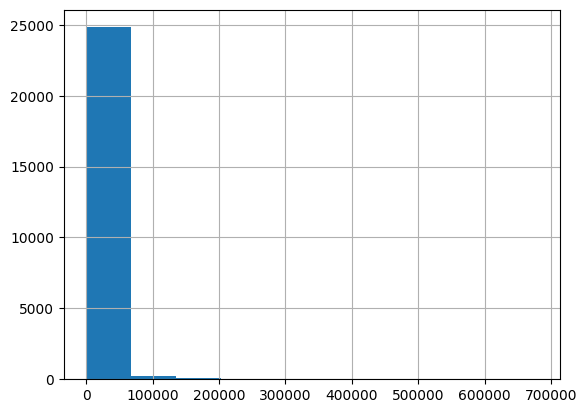

In [20]:
import matplotlib.pyplot as plt
mani_dataframe['DiabetesPopulation20Over'].hist()
plt.show()

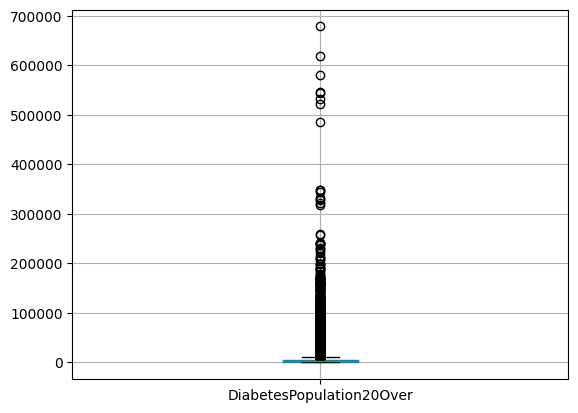

In [21]:
mani_dataframe.boxplot('DiabetesPopulation20Over')
plt.show()

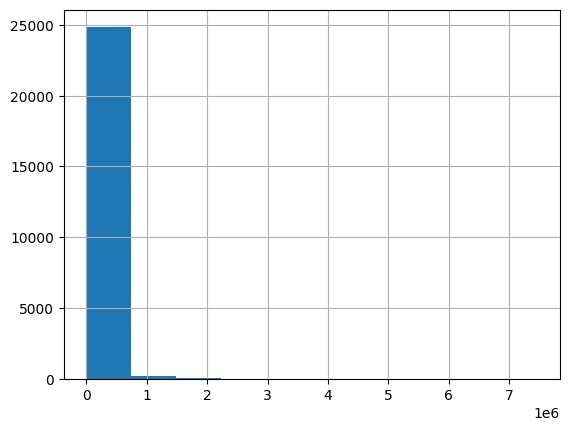

In [22]:
mani_dataframe['TotalPopulationInferred20Over'].hist()
plt.show()

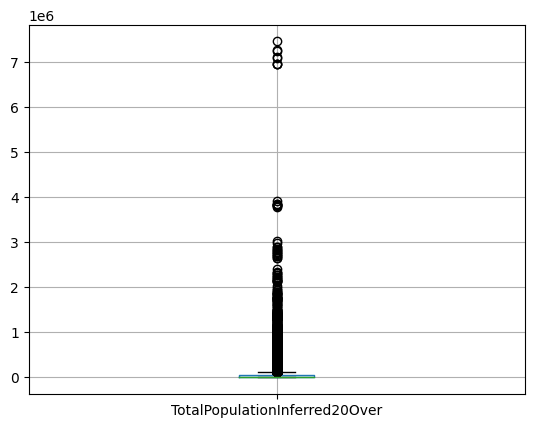

In [23]:
mani_dataframe.boxplot('TotalPopulationInferred20Over')
plt.show()

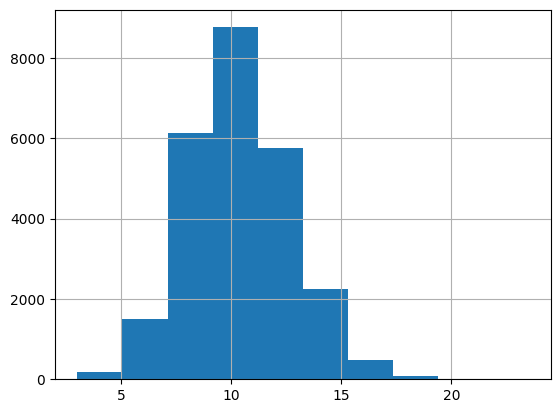

In [24]:
mani_dataframe['diabetes_prev'].hist()
plt.show()

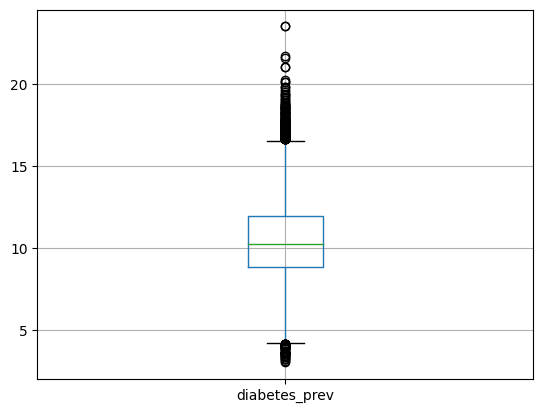

In [25]:
mani_dataframe.boxplot('diabetes_prev')
plt.show()

In [26]:
numeric_cols = ['DiabetesPopulation20Over', 'TotalPopulationInferred20Over', 'diabetes_prev']
for col in numeric_cols:

    q1 = mani_dataframe[col].quantile(0.25)
    q3 = mani_dataframe[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    mani_dataframe.loc[mani_dataframe[col] < lower_bound, col] = lower_bound
    mani_dataframe.loc[mani_dataframe[col] > upper_bound, col] = upper_bound
    outliers = mani_dataframe[(mani_dataframe[col] == lower_bound) | (mani_dataframe[col] == upper_bound)]
    print(outliers[[col]])

       DiabetesPopulation20Over
8                       11281.5
9                       11281.5
10                      11281.5
11                      11281.5
12                      11281.5
...                         ...
24917                   11281.5
24918                   11281.5
24919                   11281.5
24920                   11281.5
24943                   11281.5

[3025 rows x 1 columns]
       TotalPopulationInferred20Over
8                           110832.0
9                           110832.0
10                          110832.0
11                          110832.0
12                          110832.0
...                              ...
24940                       110832.0
24941                       110832.0
24942                       110832.0
24943                       110832.0
24944                       110832.0

[3285 rows x 1 columns]
       diabetes_prev
19         16.549372
41         16.549372
42         16.549372
43         16.549372
44         16.549

# Replacing those with the median

In [27]:
for col in numeric_cols:
  mani_dataframe.loc[mani_dataframe[col]==lower_bound, col] = mani_dataframe[col].median()
  mani_dataframe.loc[mani_dataframe[col]==upper_bound, col] = mani_dataframe[col].median()

# Save this dataframe




In [28]:
mani_dataframe.to_csv('mani_new_diabprev.csv', index=False)